## LSTM For Crude Oil Price Predictions

In [24]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
params = {'legend.fontsize': 30,
          'figure.figsize': (50, 20),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

## Import Dataset

In [25]:
df = pd.read_csv("Crude Oil Prices Daily.csv")

from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'] ,infer_datetime_format = True)

indexedDataset = df.set_index(['Date'])

### Indexed Dataset

In [3]:
indexedDataset.head(10)

,Closing Value
Date,
1986-02-01,25.56
1986-03-01,26.00
1986-06-01,26.53
1986-07-01,25.85
1986-08-01,25.87
1986-09-01,26.03
1986-10-01,25.65
1986-01-13,25.08
1986-01-14,24.97


## Checking missing values and replacing them with mean

In [4]:
indexedDataset.isnull().sum()

Closing Value    7
dtype: int64

In [5]:
x = indexedDataset.mean()
y = round(x,2)
indexedDataset= indexedDataset.fillna(y)

In [6]:
indexedDataset.isnull().sum()
indexedDataset.head(5)

,Closing Value
Date,
1986-02-01,25.56
1986-03-01,26.00
1986-06-01,26.53
1986-07-01,25.85
1986-08-01,25.87


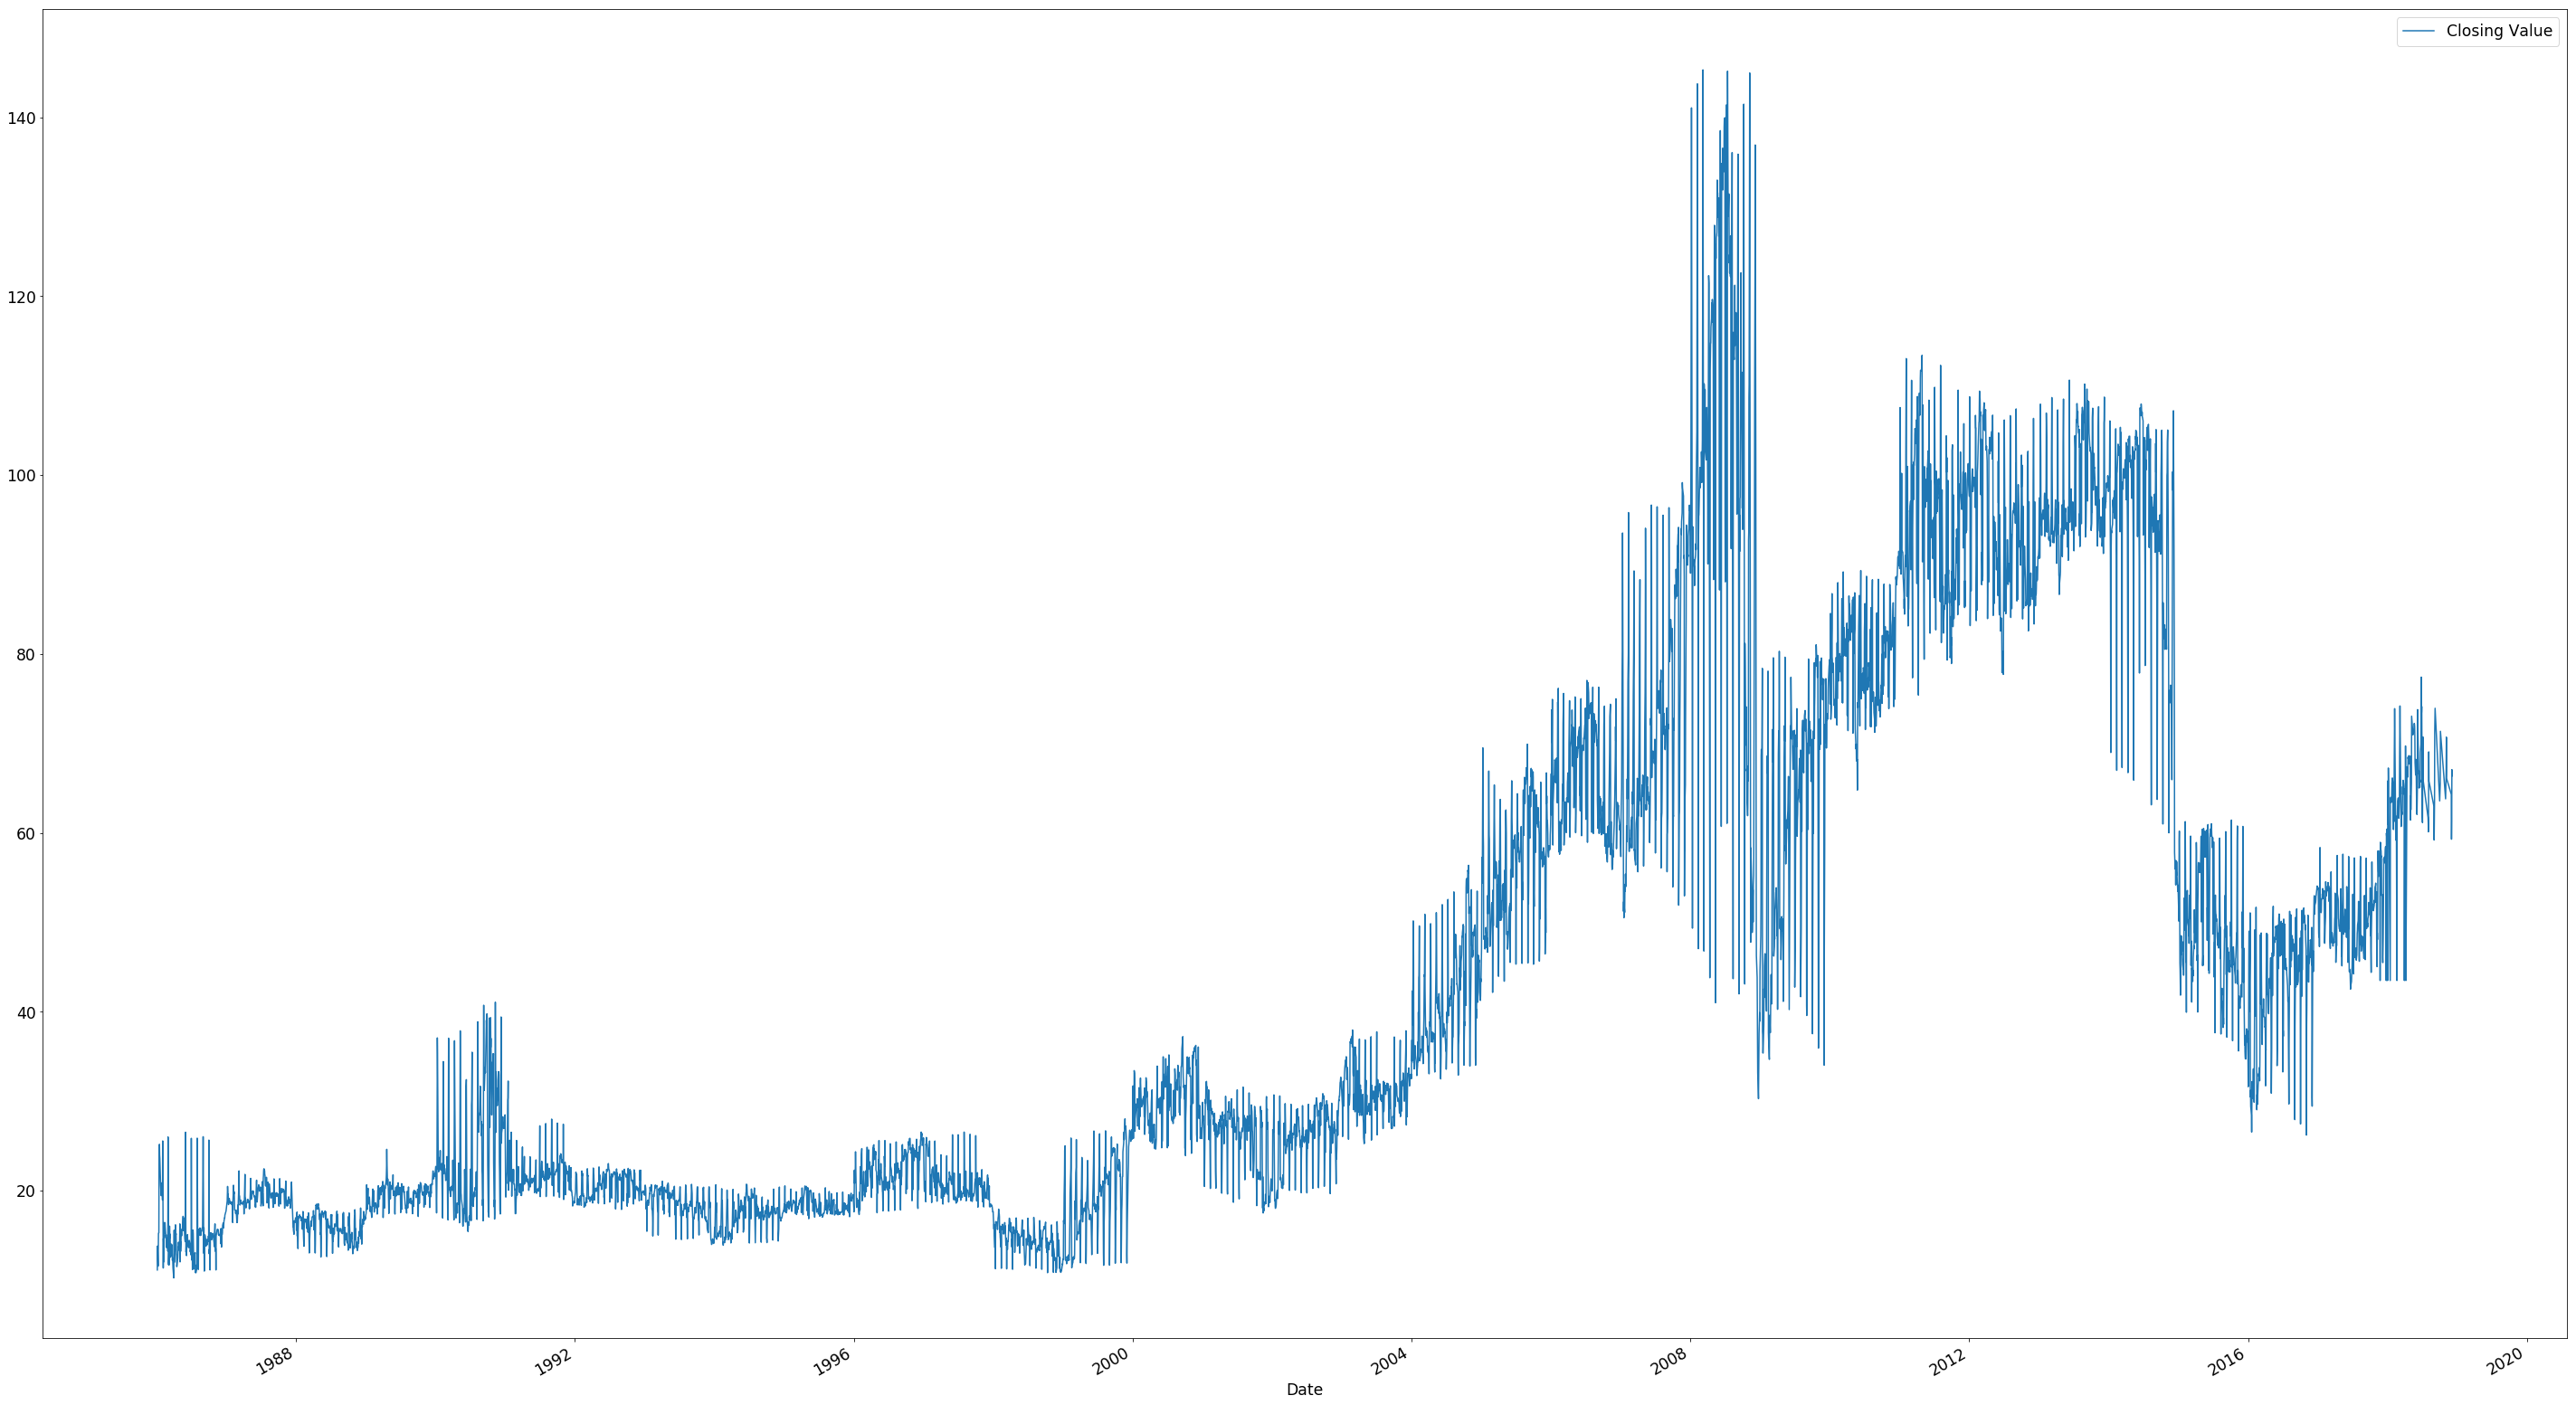

In [9]:
indexedDataset.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FED22278>]],
      dtype=object)

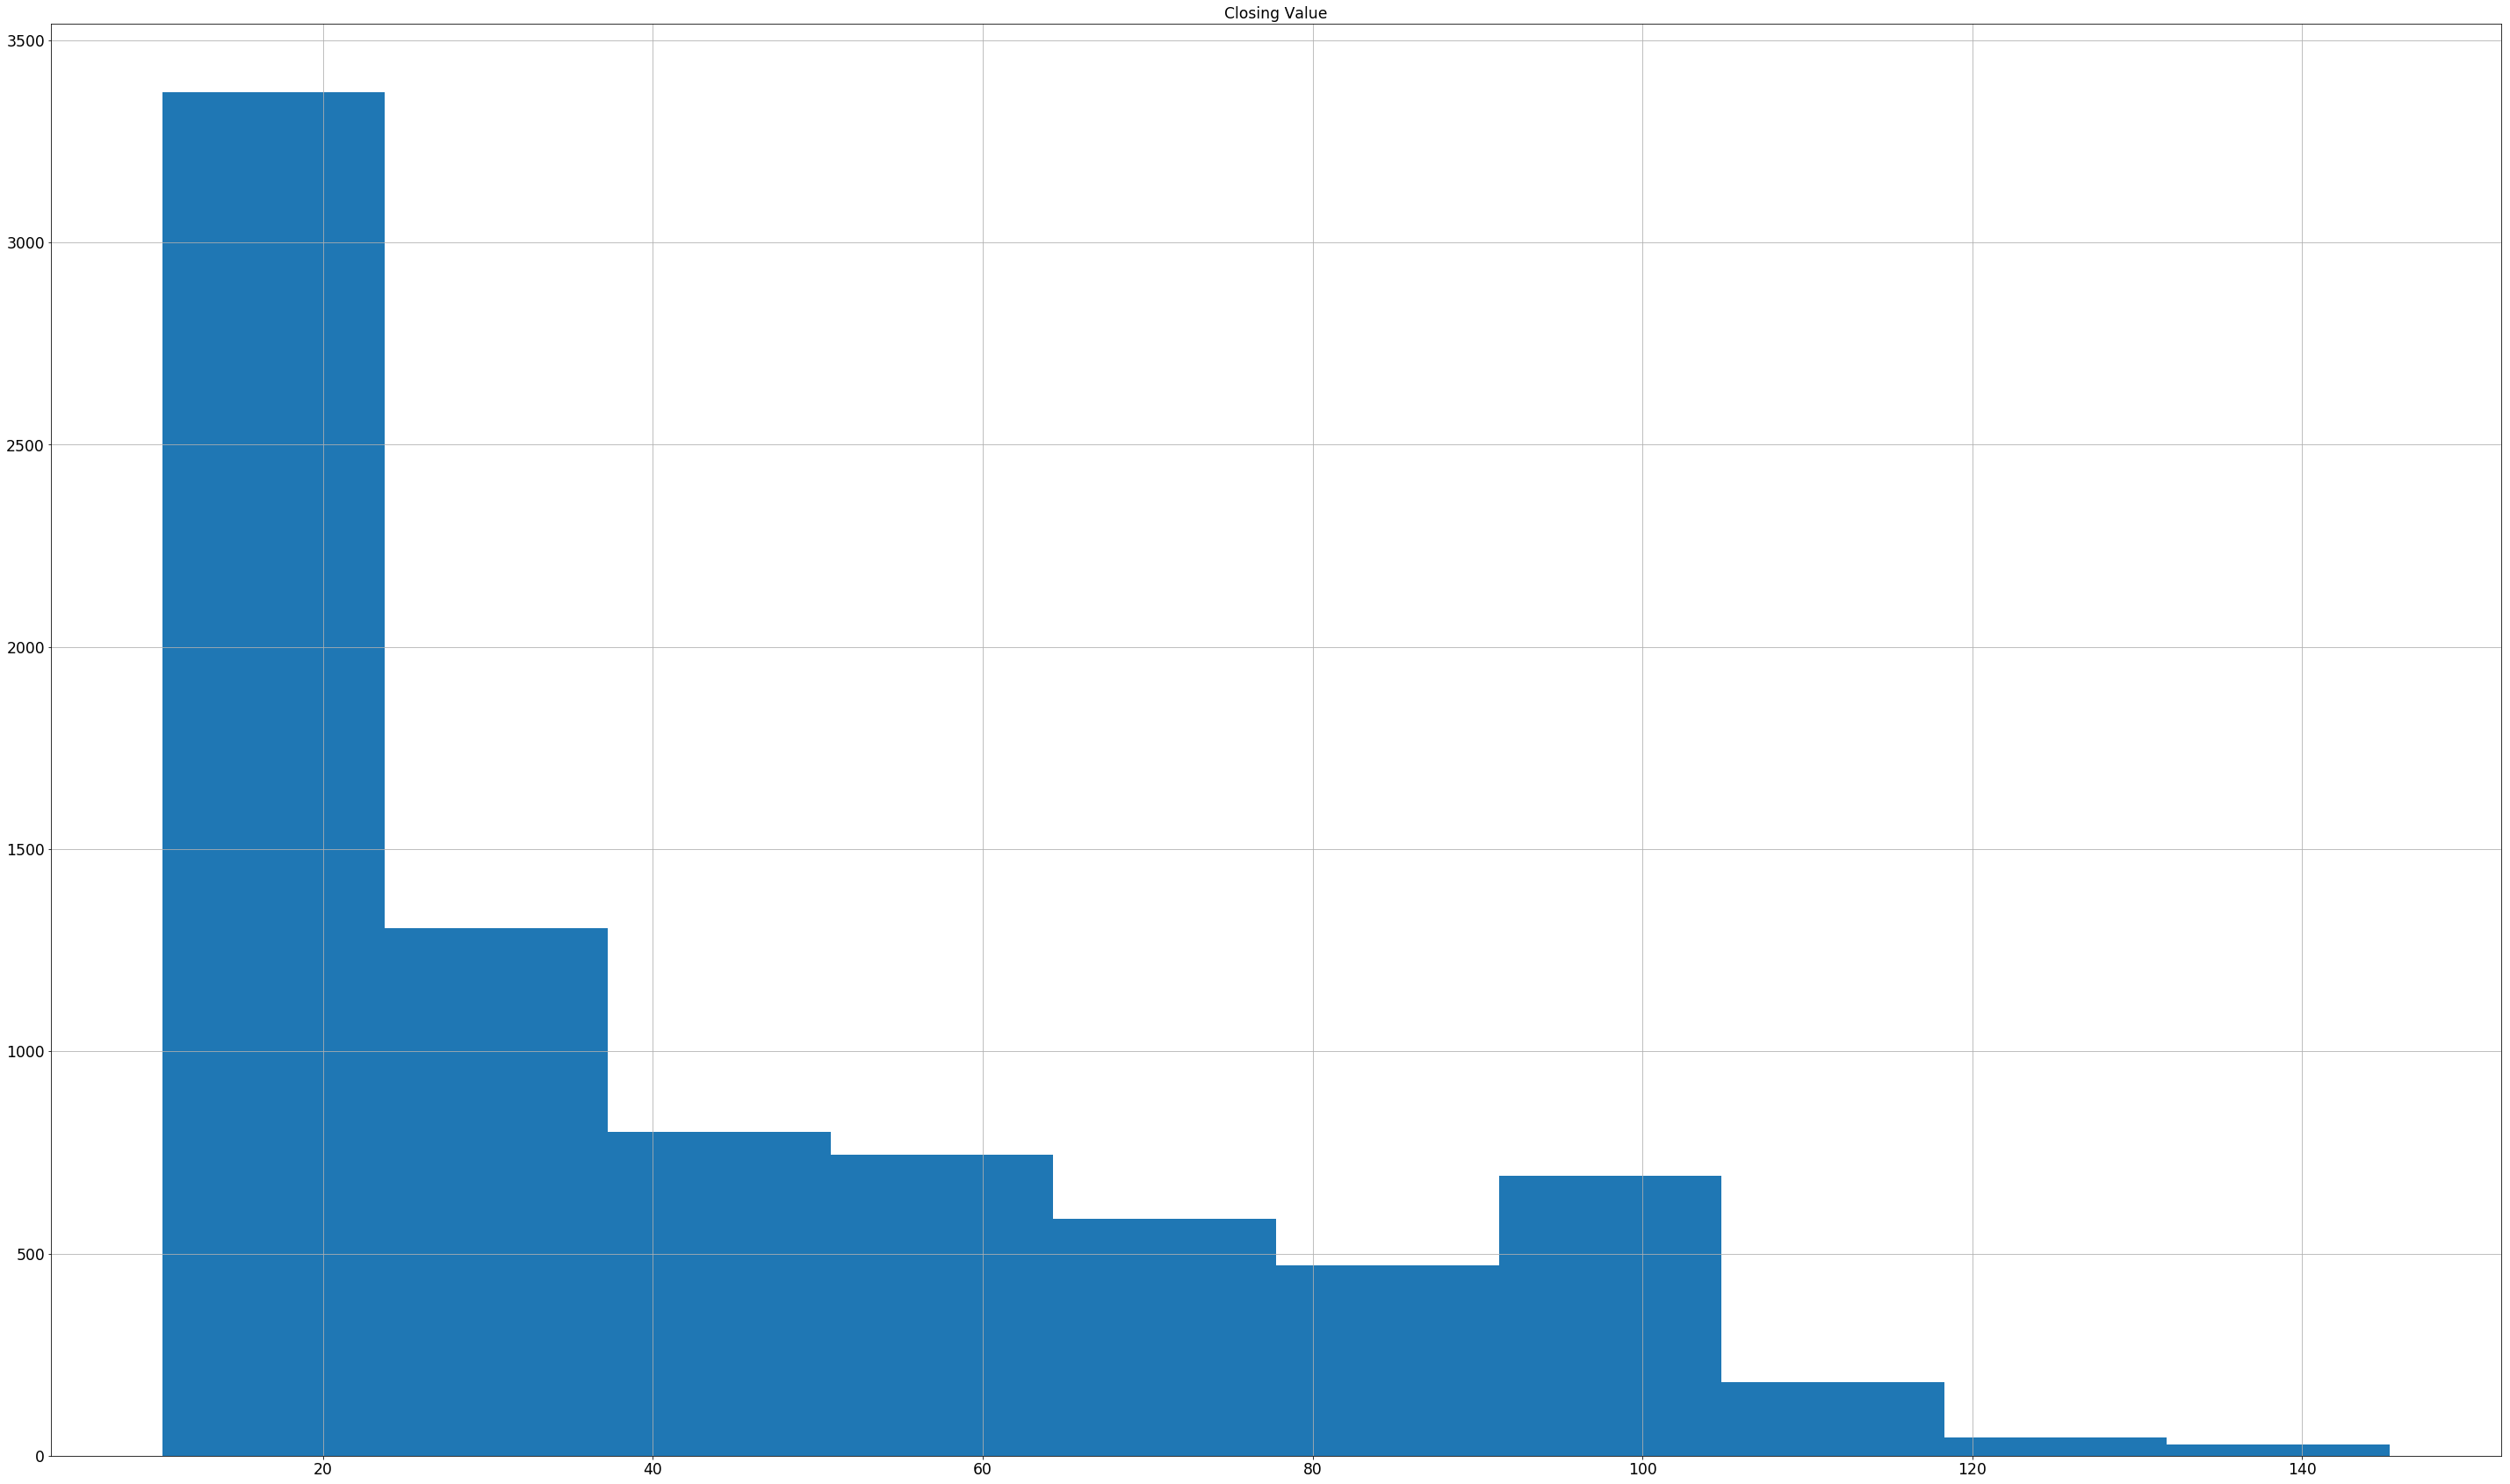

In [10]:
indexedDataset.hist(bins = 10)

#### LSTMs are sensitive to the scale of the input data. 
##### normalize the dataset using the MinMaxScaler preprocessing class

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(indexedDataset)

In [16]:
print(scaled[:10])

[[0.11335703]
 [0.11661484]
 [0.12053902]
 [0.11550422]
 [0.1156523 ]
 [0.11683696]
 [0.1140234 ]
 [0.10980305]
 [0.1089886 ]
 [0.11054346]]


After we model our data and estimate the skill of our model on the training dataset, we need to get an idea of the skill of the model on new unseen data.
Now we divide the dataset into 70% training and rest for testing

In [17]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 5756
test: 2467


This function takes two arguments: the dataset, which is a numpy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the price at a given time (t) and Y is the price of crude oil at the next time (t + 1).

In [18]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

5756 1
0
X 0 to 1
[0.11335703]
Y 1
0.11661483784984451
1
X 1 to 2
[0.11661484]
Y 2
0.12053901969495039
2
X 2 to 3
[0.12053902]
Y 3
0.11550422034651266
3
X 3 to 4
[0.11550422]
Y 4
0.11565230268029024
4
X 4 to 5
[0.1156523]
Y 5
0.1168369613505109
5
X 5 to 6
[0.11683696]
Y 6
0.11402339700873686
6
X 6 to 7
[0.1140234]
Y 7
0.10980305049607579
7
X 7 to 8
[0.10980305]
Y 8
0.10898859766029913
8
X 8 to 9
[0.1089886]
Y 9
0.1105434621649637
9
X 9 to 10
[0.11054346]
Y 10
0.10165852213830891
10
X 10 to 11
[0.10165852]
Y 11
0.09906708129720122
11
X 11 to 12
[0.09906708]
Y 12
0.08203761291277949
12
X 12 to 13
[0.08203761]
Y 13
0.07670664889678659
13
X 13 to 14
[0.07670665]
Y 14
0.07404116688879016
14
X 14 to 15
[0.07404117]
Y 15
0.07167184954834886
15
X 15 to 16
[0.07167185]
Y 16
0.06811787353768693
16
X 16 to 17
[0.06811787]
Y 17
0.07863171923589517
17
X 17 to 18
[0.07863172]
Y 18
0.06811787353768693
18
X 18 to 19
[0.06811787]
Y 19
0.0693025322079076
19
X 19 to 20
[0.06930253]
Y 20
0.069080408707241

0.03679845994372871
231
X 231 to 232
[0.03679846]
Y 232
0.0361320894417296
232
X 232 to 233
[0.03613209]
Y 233
0.03665037760995113
233
X 233 to 234
[0.03665038]
Y 234
0.036206130608618395
234
X 234 to 235
[0.03620613]
Y 235
0.03524359543906411
235
X 235 to 236
[0.0352436]
Y 236
0.03465126610395379
236
X 236 to 237
[0.03465127]
Y 237
0.0360580482748408
237
X 237 to 238
[0.03605805]
Y 238
0.03879757144972605
238
X 238 to 239
[0.03879757]
Y 239
0.0435362061306086
239
X 239 to 240
[0.04353621]
Y 240
0.04538723530282836
240
X 240 to 241
[0.04538724]
Y 241
0.04338812379683103
241
X 241 to 242
[0.04338812]
Y 242
0.041314971123944916
242
X 242 to 243
[0.04131497]
Y 243
0.04464682363394047
243
X 243 to 244
[0.04464682]
Y 244
0.04664593513993781
244
X 244 to 245
[0.04664594]
Y 245
0.049607581815489396
245
X 245 to 246
[0.04960758]
Y 246
0.04945949948171181
246
X 246 to 247
[0.0494595]
Y 247
0.051902857989041914
247
X 247 to 248
[0.05190286]
Y 248
0.05479046349770471
248
X 248 to 249
[0.05479046]

[0.05057012]
Y 567
0.05042203465126609
567
X 567 to 568
[0.05042203]
Y 568
0.050644158151932475
568
X 568 to 569
[0.05064416]
Y 569
0.04990374648304456
569
X 569 to 570
[0.04990375]
Y 570
0.04790463497704722
570
X 570 to 571
[0.04790463]
Y 571
0.04849696431215755
571
X 571 to 572
[0.04849696]
Y 572
0.05034799348437731
572
X 572 to 573
[0.05034799]
Y 573
0.04901525248037909
573
X 573 to 574
[0.04901525]
Y 574
0.05641936916925812
574
X 574 to 575
[0.05641937]
Y 575
0.05782615134014511
575
X 575 to 576
[0.05782615]
Y 576
0.05827039834147786
576
X 576 to 577
[0.0582704]
Y 577
0.060343551014363964
577
X 577 to 578
[0.06034355]
Y 578
0.05975122167925366
578
X 578 to 579
[0.05975122]
Y 579
0.06108396268325188
579
X 579 to 580
[0.06108396]
Y 580
0.05678957500370206
580
X 580 to 581
[0.05678958]
Y 581
0.05686361617059084
581
X 581 to 582
[0.05686362]
Y 582
0.05989930401303124
582
X 582 to 583
[0.0598993]
Y 583
0.05834443950836664
583
X 583 to 584
[0.05834444]
Y 584
0.060047386346808826
584
X 58

[0.04501703]
Y 751
0.04546127646971716
751
X 751 to 752
[0.04546128]
Y 752
0.04857100547904633
752
X 752 to 753
[0.04857101]
Y 753
0.04435065896638529
753
X 753 to 754
[0.04435066]
Y 754
0.055012586998371096
754
X 754 to 755
[0.05501259]
Y 755
0.05197689915593069
755
X 755 to 756
[0.0519769]
Y 756
0.0526432696579298
756
X 756 to 757
[0.05264327]
Y 757
0.047238264475048114
757
X 757 to 758
[0.04723826]
Y 758
0.049829705316155784
758
X 758 to 759
[0.04982971]
Y 759
0.05019991115059973
759
X 759 to 760
[0.05019991]
Y 760
0.04857100547904633
760
X 760 to 761
[0.04857101]
Y 761
0.050866281652598835
761
X 761 to 762
[0.05086628]
Y 762
0.05279135199170738
762
X 762 to 763
[0.05279135]
Y 763
0.04990374648304456
763
X 763 to 764
[0.04990375]
Y 764
0.05330964015992891
764
X 764 to 765
[0.05330964]
Y 765
0.0541240929957056
765
X 765 to 766
[0.05412409]
Y 766
0.05545683399970382
766
X 766 to 767
[0.05545683]
Y 767
0.055901081001036565
767
X 767 to 768
[0.05590108]
Y 768
0.058566563009033026
768
X 

1066
X 1066 to 1067
[0.07811343]
Y 1067
0.0752998667258996
1067
X 1067 to 1068
[0.07529987]
Y 1068
0.07411520805567896
1068
X 1068 to 1069
[0.07411521]
Y 1069
0.07330075521990224
1069
X 1069 to 1070
[0.07330076]
Y 1070
0.07270842588479194
1070
X 1070 to 1071
[0.07270843]
Y 1071
0.07500370205834443
1071
X 1071 to 1072
[0.0750037]
Y 1072
0.07285650821856952
1072
X 1072 to 1073
[0.07285651]
Y 1073
0.06922849104101882
1073
X 1073 to 1074
[0.06922849]
Y 1074
0.06730342070191027
1074
X 1074 to 1075
[0.06730342]
Y 1075
0.06915444987413001
1075
X 1075 to 1076
[0.06915445]
Y 1076
0.07107952021323856
1076
X 1076 to 1077
[0.07107952]
Y 1077
0.07426329038945655
1077
X 1077 to 1078
[0.07426329]
Y 1078
0.07574411372723235
1078
X 1078 to 1079
[0.07574411]
Y 1079
0.07485561972456685
1079
X 1079 to 1080
[0.07485562]
Y 1080
0.07285650821856952
1080
X 1080 to 1081
[0.07285651]
Y 1081
0.07241226121723678
1081
X 1081 to 1082
[0.07241226]
Y 1082
0.07470753739078927
1082
X 1082 to 1083
[0.07470754]
Y 1083
0.

1266
X 1266 to 1267
[0.12475937]
Y 1267
0.1303124537242707
1267
X 1267 to 1268
[0.13031245]
Y 1268
0.1333481415667111
1268
X 1268 to 1269
[0.13334814]
Y 1269
0.127721012883163
1269
X 1269 to 1270
[0.12772101]
Y 1270
0.12461128387383384
1270
X 1270 to 1271
[0.12461128]
Y 1271
0.12364874870427957
1271
X 1271 to 1272
[0.12364875]
Y 1272
0.1266103953798312
1272
X 1272 to 1273
[0.1266104]
Y 1273
0.12364874870427957
1273
X 1273 to 1274
[0.12364875]
Y 1274
0.12831334221827334
1274
X 1274 to 1275
[0.12831334]
Y 1275
0.13497704723826448
1275
X 1275 to 1276
[0.13497705]
Y 1276
0.12053901969495039
1276
X 1276 to 1277
[0.12053902]
Y 1277
0.11372723234118169
1277
X 1277 to 1278
[0.11372723]
Y 1278
0.10832222715829999
1278
X 1278 to 1279
[0.10832223]
Y 1279
0.12586998371094327
1279
X 1279 to 1280
[0.12586998]
Y 1280
0.127721012883163
1280
X 1280 to 1281
[0.12772101]
Y 1281
0.13142307122760255
1281
X 1281 to 1282
[0.13142307]
Y 1282
0.12809121871760698
1282
X 1282 to 1283
[0.12809122]
Y 1283
0.127202

0.08921960610099215
1438
X 1438 to 1439
[0.08921961]
Y 1439
0.0828520657485562
1439
X 1439 to 1440
[0.08285207]
Y 1440
0.08648008292610691
1440
X 1440 to 1441
[0.08648008]
Y 1441
0.08536946542277506
1441
X 1441 to 1442
[0.08536947]
Y 1442
0.08685028876055086
1442
X 1442 to 1443
[0.08685029]
Y 1443
0.08596179475788539
1443
X 1443 to 1444
[0.08596179]
Y 1444
0.08529542425588628
1444
X 1444 to 1445
[0.08529542]
Y 1445
0.08714645342810602
1445
X 1445 to 1446
[0.08714645]
Y 1446
0.08907152376721457
1446
X 1446 to 1447
[0.08907152]
Y 1447
0.08907152376721457
1447
X 1447 to 1448
[0.08907152]
Y 1448
0.0852213830889975
1448
X 1448 to 1449
[0.08522138]
Y 1449
0.0851473419221087
1449
X 1449 to 1450
[0.08514734]
Y 1450
0.08374055975122167
1450
X 1450 to 1451
[0.08374056]
Y 1451
0.08225973641344587
1451
X 1451 to 1452
[0.08225974]
Y 1452
0.0828520657485562
1452
X 1452 to 1453
[0.08285207]
Y 1453
0.08448097142010959
1453
X 1453 to 1454
[0.08448097]
Y 1454
0.08337035391677773
1454
X 1454 to 1455
[0.0

1722
X 1722 to 1723
[0.08536947]
Y 1723
0.08448097142010959
1723
X 1723 to 1724
[0.08448097]
Y 1724
0.085739671257219
1724
X 1724 to 1725
[0.08573967]
Y 1725
0.085739671257219
1725
X 1725 to 1726
[0.08573967]
Y 1726
0.08648008292610691
1726
X 1726 to 1727
[0.08648008]
Y 1727
0.0852213830889975
1727
X 1727 to 1728
[0.08522138]
Y 1728
0.08588775359099661
1728
X 1728 to 1729
[0.08588775]
Y 1729
0.08618391825855175
1729
X 1729 to 1730
[0.08618392]
Y 1730
0.08692432992743963
1730
X 1730 to 1731
[0.08692433]
Y 1731
0.08692432992743963
1731
X 1731 to 1732
[0.08692433]
Y 1732
0.08907152376721457
1732
X 1732 to 1733
[0.08907152]
Y 1733
0.08788686509699394
1733
X 1733 to 1734
[0.08788687]
Y 1734
0.08818302976454907
1734
X 1734 to 1735
[0.08818303]
Y 1735
0.08973789426921368
1735
X 1735 to 1736
[0.08973789]
Y 1736
0.08929364726788093
1736
X 1736 to 1737
[0.08929365]
Y 1737
0.08833111209832666
1737
X 1737 to 1738
[0.08833111]
Y 1738
0.08610987709166294
1738
X 1738 to 1739
[0.08610988]
Y 1739
0.083

Y 1866
0.07093143787946098
1866
X 1866 to 1867
[0.07093144]
Y 1867
0.07374500222123502
1867
X 1867 to 1868
[0.073745]
Y 1868
0.07685473123056417
1868
X 1868 to 1869
[0.07685473]
Y 1869
0.07618836072856507
1869
X 1869 to 1870
[0.07618836]
Y 1870
0.07648452539612023
1870
X 1870 to 1871
[0.07648453]
Y 1871
0.07515178439212201
1871
X 1871 to 1872
[0.07515178]
Y 1872
0.07559603139345476
1872
X 1872 to 1873
[0.07559603]
Y 1873
0.07581815489412112
1873
X 1873 to 1874
[0.07581815]
Y 1874
0.07537390789278837
1874
X 1874 to 1875
[0.07537391]
Y 1875
0.0752998667258996
1875
X 1875 to 1876
[0.07529987]
Y 1876
0.07500370205834443
1876
X 1876 to 1877
[0.0750037]
Y 1877
0.07359691988745744
1877
X 1877 to 1878
[0.07359692]
Y 1878
0.07070931437879462
1878
X 1878 to 1879
[0.07070931]
Y 1879
0.06856212053901971
1879
X 1879 to 1880
[0.06856212]
Y 1880
0.06856212053901971
1880
X 1880 to 1881
[0.06856212]
Y 1881
0.06715533836813269
1881
X 1881 to 1882
[0.06715534]
Y 1882
0.06589663853102325
1882
X 1882 to 18

[0.03605805]
Y 2066
0.03250407226417888
2066
X 2066 to 2067
[0.03250407]
Y 2067
0.032133866429734925
2067
X 2067 to 2068
[0.03213387]
Y 2068
0.03302236043240042
2068
X 2068 to 2069
[0.03302236]
Y 2069
0.02887605508662816
2069
X 2069 to 2070
[0.02887606]
Y 2070
0.028727972752850592
2070
X 2070 to 2071
[0.02872797]
Y 2071
0.026950984747519627
2071
X 2071 to 2072
[0.02695098]
Y 2072
0.029690507922404852
2072
X 2072 to 2073
[0.02969051]
Y 2073
0.02932030208796091
2073
X 2073 to 2074
[0.0293203]
Y 2074
0.02983859025618242
2074
X 2074 to 2075
[0.02983859]
Y 2075
0.029098178587294535
2075
X 2075 to 2076
[0.02909818]
Y 2076
0.0338368132681771
2076
X 2076 to 2077
[0.03383681]
Y 2077
0.031319413593958234
2077
X 2077 to 2078
[0.03131941]
Y 2078
0.03146749592773582
2078
X 2078 to 2079
[0.0314675]
Y 2079
0.03354064860062193
2079
X 2079 to 2080
[0.03354065]
Y 2080
0.03368873093439953
2080
X 2080 to 2081
[0.03368873]
Y 2081
0.03324448393306678
2081
X 2081 to 2082
[0.03324448]
Y 2082
0.031985784095957

[0.05516067]
Y 2266
0.057752110173256335
2266
X 2266 to 2267
[0.05775211]
Y 2267
0.05812231600770028
2267
X 2267 to 2268
[0.05812232]
Y 2268
0.057159780838146004
2268
X 2268 to 2269
[0.05715978]
Y 2269
0.05782615134014511
2269
X 2269 to 2270
[0.05782615]
Y 2270
0.055678957500370205
2270
X 2270 to 2271
[0.05567896]
Y 2271
0.04997778764993337
2271
X 2271 to 2272
[0.04997779]
Y 2272
0.04908929364726787
2272
X 2272 to 2273
[0.04908929]
Y 2273
0.04945949948171181
2273
X 2273 to 2274
[0.0494595]
Y 2274
0.04894121131349029
2274
X 2274 to 2275
[0.04894121]
Y 2275
0.05101436398637642
2275
X 2275 to 2276
[0.05101436]
Y 2276
0.050866281652598835
2276
X 2276 to 2277
[0.05086628]
Y 2277
0.049385458314823036
2277
X 2277 to 2278
[0.04938546]
Y 2278
0.049829705316155784
2278
X 2278 to 2279
[0.04982971]
Y 2279
0.0496816229823782
2279
X 2279 to 2280
[0.04968162]
Y 2280
0.04701614097438177
2280
X 2280 to 2281
[0.04701614]
Y 2281
0.04879312897971272
2281
X 2281 to 2282
[0.04879313]
Y 2282
0.04931141714793

X 2465 to 2466
[0.06100992]
Y 2466
0.06300903302236045
2466
X 2466 to 2467
[0.06300903]
Y 2467
0.061306086183918265
2467
X 2467 to 2468
[0.06130609]
Y 2468
0.06382348585813712
2468
X 2468 to 2469
[0.06382349]
Y 2469
0.06434177402635867
2469
X 2469 to 2470
[0.06434177]
Y 2470
0.06419369169258109
2470
X 2470 to 2471
[0.06419369]
Y 2471
0.0648600621945802
2471
X 2471 to 2472
[0.06486006]
Y 2472
0.061306086183918265
2472
X 2472 to 2473
[0.06130609]
Y 2473
0.0565674515030357
2473
X 2473 to 2474
[0.05656745]
Y 2474
0.05197689915593069
2474
X 2474 to 2475
[0.0519769]
Y 2475
0.05279135199170738
2475
X 2475 to 2476
[0.05279135]
Y 2476
0.05345772249370649
2476
X 2476 to 2477
[0.05345772]
Y 2477
0.05471642233081593
2477
X 2477 to 2478
[0.05471642]
Y 2478
0.055308751665926234
2478
X 2478 to 2479
[0.05530875]
Y 2479
0.05397601066192802
2479
X 2479 to 2480
[0.05397601]
Y 2480
0.05493854583148232
2480
X 2480 to 2481
[0.05493855]
Y 2481
0.0541240929957056
2481
X 2481 to 2482
[0.05412409]
Y 2482
0.0523

2665
X 2665 to 2666
[0.07685473]
Y 2666
0.07944617207167186
2666
X 2666 to 2667
[0.07944617]
Y 2667
0.07900192507033911
2667
X 2667 to 2668
[0.07900193]
Y 2668
0.08314823041611134
2668
X 2668 to 2669
[0.08314823]
Y 2669
0.08018658374055974
2669
X 2669 to 2670
[0.08018658]
Y 2670
0.08240781874722346
2670
X 2670 to 2671
[0.08240782]
Y 2671
0.08440693025322078
2671
X 2671 to 2672
[0.08440693]
Y 2672
0.08203761291277949
2672
X 2672 to 2673
[0.08203761]
Y 2673
0.08344439508366651
2673
X 2673 to 2674
[0.0834444]
Y 2674
0.08374055975122167
2674
X 2674 to 2675
[0.08374056]
Y 2675
0.0867022064267733
2675
X 2675 to 2676
[0.08670221]
Y 2676
0.08625795942544053
2676
X 2676 to 2677
[0.08625796]
Y 2677
0.09018214127054643
2677
X 2677 to 2678
[0.09018214]
Y 2678
0.08907152376721457
2678
X 2678 to 2679
[0.08907152]
Y 2679
0.08440693025322078
2679
X 2679 to 2680
[0.08440693]
Y 2680
0.08462905375388714
2680
X 2680 to 2681
[0.08462905]
Y 2681
0.07922404857100547
2681
X 2681 to 2682
[0.07922405]
Y 2682
0.

[0.07004294]
Y 2939
0.06974677920924034
2939
X 2939 to 2940
[0.06974678]
Y 2940
0.07278246705168072
2940
X 2940 to 2941
[0.07278247]
Y 2941
0.07537390789278837
2941
X 2941 to 2942
[0.07537391]
Y 2942
0.07359691988745744
2942
X 2942 to 2943
[0.07359692]
Y 2943
0.07418924922256774
2943
X 2943 to 2944
[0.07418925]
Y 2944
0.07818747223456239
2944
X 2944 to 2945
[0.07818747]
Y 2945
0.07803938990078484
2945
X 2945 to 2946
[0.07803939]
Y 2946
0.07559603139345476
2946
X 2946 to 2947
[0.07559603]
Y 2947
0.07285650821856952
2947
X 2947 to 2948
[0.07285651]
Y 2948
0.0690804087072412
2948
X 2948 to 2949
[0.06908041]
Y 2949
0.07019102621057309
2949
X 2949 to 2950
[0.07019103]
Y 2950
0.07152376721457131
2950
X 2950 to 2951
[0.07152377]
Y 2951
0.07359691988745744
2951
X 2951 to 2952
[0.07359692]
Y 2952
0.072338220050348
2952
X 2952 to 2953
[0.07233822]
Y 2953
0.07278246705168072
2953
X 2953 to 2954
[0.07278247]
Y 2954
0.07174589071523767
2954
X 2954 to 2955
[0.07174589]
Y 2955
0.07248630238412555
295

Y 3165
0.024359543906411957
3165
X 3165 to 3166
[0.02435954]
Y 3166
0.03257811343106767
3166
X 3166 to 3167
[0.03257811]
Y 3167
0.03176366059529097
3167
X 3167 to 3168
[0.03176366]
Y 3168
0.027025025914408404
3168
X 3168 to 3169
[0.02702503]
Y 3169
0.02932030208796091
3169
X 3169 to 3170
[0.0293203]
Y 3170
0.029912631423071212
3170
X 3170 to 3171
[0.02991263]
Y 3171
0.029986672589960017
3171
X 3171 to 3172
[0.02998667]
Y 3172
0.031245372427069457
3172
X 3172 to 3173
[0.03124537]
Y 3173
0.032059825262846134
3173
X 3173 to 3174
[0.03205983]
Y 3174
0.02680290241374203
3174
X 3174 to 3175
[0.0268029]
Y 3175
0.02650673774618688
3175
X 3175 to 3176
[0.02650674]
Y 3176
0.027839478750185095
3176
X 3176 to 3177
[0.02783948]
Y 3177
0.027839478750185095
3177
X 3177 to 3178
[0.02783948]
Y 3178
0.027469272915741152
3178
X 3178 to 3179
[0.02746927]
Y 3179
0.028209684584629052
3179
X 3179 to 3180
[0.02820968]
Y 3180
0.03420701910262104
3180
X 3180 to 3181
[0.03420702]
Y 3181
0.03442914260328743
3181


Y 3441
0.07670664889678659
3441
X 3441 to 3442
[0.07670665]
Y 3442
0.08026062490744855
3442
X 3442 to 3443
[0.08026062]
Y 3443
0.07604027839478748
3443
X 3443 to 3444
[0.07604028]
Y 3444
0.07559603139345476
3444
X 3444 to 3445
[0.07559603]
Y 3445
0.07374500222123502
3445
X 3445 to 3446
[0.073745]
Y 3446
0.07581815489412112
3446
X 3446 to 3447
[0.07581815]
Y 3447
0.07715089589811937
3447
X 3447 to 3448
[0.0771509]
Y 3448
0.07877980156967275
3448
X 3448 to 3449
[0.0787798]
Y 3449
0.08151932474455799
3449
X 3449 to 3450
[0.08151932]
Y 3450
0.0818895305790019
3450
X 3450 to 3451
[0.08188953]
Y 3451
0.08359247741744409
3451
X 3451 to 3452
[0.08359248]
Y 3452
0.08270398341477862
3452
X 3452 to 3453
[0.08270398]
Y 3453
0.0845550125869984
3453
X 3453 to 3454
[0.08455501]
Y 3454
0.08211165407966829
3454
X 3454 to 3455
[0.08211165]
Y 3455
0.08477713608766473
3455
X 3455 to 3456
[0.08477714]
Y 3456
0.08359247741744409
3456
X 3456 to 3457
[0.08359248]
Y 3457
0.08596179475788539
3457
X 3457 to 3458

[0.18969347]
Y 3727
0.19620909225529393
3727
X 3727 to 3728
[0.19620909]
Y 3728
0.1977639567599585
3728
X 3728 to 3729
[0.19776396]
Y 3729
0.19968902709906705
3729
X 3729 to 3730
[0.19968903]
Y 3730
0.17466311269065599
3730
X 3730 to 3731
[0.17466311]
Y 3731
0.16592625499777874
3731
X 3731 to 3732
[0.16592625]
Y 3732
0.1573374796386791
3732
X 3732 to 3733
[0.15733748]
Y 3733
0.15941063231156521
3733
X 3733 to 3734
[0.15941063]
Y 3734
0.15533836813268176
3734
X 3734 to 3735
[0.15533837]
Y 3735
0.14815637494446915
3735
X 3735 to 3736
[0.14815637]
Y 3736
0.15267288612468533
3736
X 3736 to 3737
[0.15267289]
Y 3737
0.16140974381756257
3737
X 3737 to 3738
[0.16140974]
Y 3738
0.16000296164667555
3738
X 3738 to 3739
[0.16000296]
Y 3739
0.1529690507922405
3739
X 3739 to 3740
[0.15296905]
Y 3740
0.15111802162002075
3740
X 3740 to 3741
[0.15111802]
Y 3741
0.15259884495779652
3741
X 3741 to 3742
[0.15259884]
Y 3742
0.16089145564934104
3742
X 3742 to 3743
[0.16089146]
Y 3743
0.17059084851177253
374

X 3864 to 3865
[0.12520361]
Y 3865
0.12579594254405446
3865
X 3865 to 3866
[0.12579594]
Y 3866
0.12453724270694506
3866
X 3866 to 3867
[0.12453724]
Y 3867
0.1273508070487191
3867
X 3867 to 3868
[0.12735081]
Y 3868
0.13490300607137568
3868
X 3868 to 3869
[0.13490301]
Y 3869
0.13453280023693176
3869
X 3869 to 3870
[0.1345328]
Y 3870
0.13697615874426183
3870
X 3870 to 3871
[0.13697616]
Y 3871
0.13742040574559455
3871
X 3871 to 3872
[0.13742041]
Y 3872
0.13060861839182586
3872
X 3872 to 3873
[0.13060862]
Y 3873
0.13016437139049308
3873
X 3873 to 3874
[0.13016437]
Y 3874
0.13083074189249222
3874
X 3874 to 3875
[0.13083074]
Y 3875
0.12401895453872354
3875
X 3875 to 3876
[0.12401895]
Y 3876
0.12379683103805715
3876
X 3876 to 3877
[0.12379683]
Y 3877
0.11098770916629645
3877
X 3877 to 3878
[0.11098771]
Y 3878
0.11609654968162299
3878
X 3878 to 3879
[0.11609655]
Y 3879
0.13490300607137568
3879
X 3879 to 3880
[0.13490301]
Y 3880
0.13401451206871023
3880
X 3880 to 3881
[0.13401451]
Y 3881
0.13497

4064
X 4064 to 4065
[0.06552643]
Y 4065
0.06900636754035243
4065
X 4065 to 4066
[0.06900637]
Y 4066
0.07070931437879462
4066
X 4066 to 4067
[0.07070931]
Y 4067
0.07256034355101436
4067
X 4067 to 4068
[0.07256034]
Y 4068
0.0670072560343551
4068
X 4068 to 4069
[0.06700726]
Y 4069
0.06560047386346808
4069
X 4069 to 4070
[0.06560047]
Y 4070
0.07004294387679551
4070
X 4070 to 4071
[0.07004294]
Y 4071
0.07515178439212201
4071
X 4071 to 4072
[0.07515178]
Y 4072
0.072338220050348
4072
X 4072 to 4073
[0.07233822]
Y 4073
0.07263438471790314
4073
X 4073 to 4074
[0.07263438]
Y 4074
0.07048719087812823
4074
X 4074 to 4075
[0.07048719]
Y 4075
0.07033910854435065
4075
X 4075 to 4076
[0.07033911]
Y 4076
0.07404116688879016
4076
X 4076 to 4077
[0.07404117]
Y 4077
0.08174144824522432
4077
X 4077 to 4078
[0.08174145]
Y 4078
0.07781726640011848
4078
X 4078 to 4079
[0.07781727]
Y 4079
0.08100103657633644
4079
X 4079 to 4080
[0.08100104]
Y 4080
0.08100103657633644
4080
X 4080 to 4081
[0.08100104]
Y 4081
0.0

4264
X 4264 to 4265
[0.1118762]
Y 4265
0.11535613801273507
4265
X 4265 to 4266
[0.11535614]
Y 4266
0.1167629201836221
4266
X 4266 to 4267
[0.11676292]
Y 4267
0.11802162002073154
4267
X 4267 to 4268
[0.11802162]
Y 4268
0.11128387383385162
4268
X 4268 to 4269
[0.11128387]
Y 4269
0.11217236783651709
4269
X 4269 to 4270
[0.11217237]
Y 4270
0.112912779505405
4270
X 4270 to 4271
[0.11291278]
Y 4271
0.12187176069894863
4271
X 4271 to 4272
[0.12187176]
Y 4272
0.11965052569228492
4272
X 4272 to 4273
[0.11965053]
Y 4273
0.12401895453872354
4273
X 4273 to 4274
[0.12401895]
Y 4274
0.12453724270694506
4274
X 4274 to 4275
[0.12453724]
Y 4275
0.1294239597216052
4275
X 4275 to 4276
[0.12942396]
Y 4276
0.12409299570561232
4276
X 4276 to 4277
[0.124093]
Y 4277
0.12105730786317194
4277
X 4277 to 4278
[0.12105731]
Y 4278
0.12305641936916926
4278
X 4278 to 4279
[0.12305642]
Y 4279
0.12601806604472088
4279
X 4279 to 4280
[0.12601807]
Y 4280
0.1265363542129424
4280
X 4280 to 4281
[0.12653635]
Y 4281
0.122538

0.1549681622982378
4464
X 4464 to 4465
[0.15496816]
Y 4465
0.15667110913667998
4465
X 4465 to 4466
[0.15667111]
Y 4466
0.15926254997778766
4466
X 4466 to 4467
[0.15926255]
Y 4467
0.1430475344291426
4467
X 4467 to 4468
[0.14304753]
Y 4468
0.14201095809269954
4468
X 4468 to 4469
[0.14201096]
Y 4469
0.13786465274692727
4469
X 4469 to 4470
[0.13786465]
Y 4470
0.13830889974826005
4470
X 4470 to 4471
[0.1383089]
Y 4471
0.13771657041314972
4471
X 4471 to 4472
[0.13771657]
Y 4472
0.14045609358803496
4472
X 4472 to 4473
[0.14045609]
Y 4473
0.14186287575892198
4473
X 4473 to 4474
[0.14186288]
Y 4474
0.13779061158003847
4474
X 4474 to 4475
[0.13779061]
Y 4475
0.1333481415667111
4475
X 4475 to 4476
[0.13334814]
Y 4476
0.1325336887309344
4476
X 4476 to 4477
[0.13253369]
Y 4477
0.12846142455205095
4477
X 4477 to 4478
[0.12846142]
Y 4478
0.12401895453872354
4478
X 4478 to 4479
[0.12401895]
Y 4479
0.12594402487783207
4479
X 4479 to 4480
[0.12594402]
Y 4480
0.12350066637050199
4480
X 4480 to 4481
[0.12

Y 4764
0.27506293499185547
4764
X 4764 to 4765
[0.27506293]
Y 4765
0.2846882866873982
4765
X 4765 to 4766
[0.28468829]
Y 4766
0.27580334666074335
4766
X 4766 to 4767
[0.27580335]
Y 4767
0.2743225233229675
4767
X 4767 to 4768
[0.27432252]
Y 4768
0.2717310824818599
4768
X 4768 to 4769
[0.27173108]
Y 4769
0.26543758329631273
4769
X 4769 to 4770
[0.26543758]
Y 4770
0.270990670812972
4770
X 4770 to 4771
[0.27099067]
Y 4771
0.2669184066340885
4771
X 4771 to 4772
[0.26691841]
Y 4772
0.286169110025174
4772
X 4772 to 4773
[0.28616911]
Y 4773
0.28305938101584477
4773
X 4773 to 4774
[0.28305938]
Y 4774
0.28498445135495337
4774
X 4774 to 4775
[0.28498445]
Y 4775
0.28794609803050497
4775
X 4775 to 4776
[0.2879461]
Y 4776
0.292166444543166
4776
X 4776 to 4777
[0.29216644]
Y 4777
0.2880941803642825
4777
X 4777 to 4778
[0.28809418]
Y 4778
0.2614393602843181
4778
X 4778 to 4779
[0.26143936]
Y 4779
0.24478009773434029
4779
X 4779 to 4780
[0.2447801]
Y 4780
0.23922701021768106
4780
X 4780 to 4781
[0.2392

Y 4964
0.42321930993632456
4964
X 4964 to 4965
[0.42321931]
Y 4965
0.44172960165852215
4965
X 4965 to 4966
[0.4417296]
Y 4966
0.43225233229675697
4966
X 4966 to 4967
[0.43225233]
Y 4967
0.4386939138160817
4967
X 4967 to 4968
[0.43869391]
Y 4968
0.4195172515918851
4968
X 4968 to 4969
[0.41951725]
Y 4969
0.4115208055678957
4969
X 4969 to 4970
[0.41152081]
Y 4970
0.4007848363690211
4970
X 4970 to 4971
[0.40078484]
Y 4971
0.40389456537835033
4971
X 4971 to 4972
[0.40389457]
Y 4972
0.39952613653191166
4972
X 4972 to 4973
[0.39952614]
Y 4973
0.392714349178143
4973
X 4973 to 4974
[0.39271435]
Y 4974
0.3918998963423663
4974
X 4974 to 4975
[0.3918999]
Y 4975
0.406856212053902
4975
X 4975 to 4976
[0.40685621]
Y 4976
0.40270990670812973
4976
X 4976 to 4977
[0.40270991]
Y 4977
0.389900784836369
4977
X 4977 to 4978
[0.38990078]
Y 4978
0.42173848659854873
4978
X 4978 to 4979
[0.42173849]
Y 4979
0.41455649341033607
4979
X 4979 to 4980
[0.41455649]
Y 4980
0.419887457426329
4980
X 4980 to 4981
[0.41988

[0.36050644]
Y 5264
0.3678365171035095
5264
X 5264 to 5265
[0.36783652]
Y 5265
0.37709166296460833
5265
X 5265 to 5266
[0.37709166]
Y 5266
0.36583740559751216
5266
X 5266 to 5267
[0.36583741]
Y 5267
0.35791500074041166
5267
X 5267 to 5268
[0.357915]
Y 5268
0.35561972456685914
5268
X 5268 to 5269
[0.35561972]
Y 5269
0.35939582407818743
5269
X 5269 to 5270
[0.35939582]
Y 5270
0.3404412853546572
5270
X 5270 to 5271
[0.34044129]
Y 5271
0.3379979268473271
5271
X 5271 to 5272
[0.33799793]
Y 5272
0.3418480675255442
5272
X 5272 to 5273
[0.34184807]
Y 5273
0.3536206130608618
5273
X 5273 to 5274
[0.35362061]
Y 5274
0.34821560787798017
5274
X 5274 to 5275
[0.34821561]
Y 5275
0.37057604027839475
5275
X 5275 to 5276
[0.37057604]
Y 5276
0.3755367984599437
5276
X 5276 to 5277
[0.3755368]
Y 5277
0.38649489115948465
5277
X 5277 to 5278
[0.38649489]
Y 5278
0.39034503183770175
5278
X 5278 to 5279
[0.39034503]
Y 5279
0.39375092551458607
5279
X 5279 to 5280
[0.39375093]
Y 5280
0.38605064415815193
5280
X 52

X 5463 to 5464
[0.45705612]
Y 5464
0.45564934103361476
5464
X 5464 to 5465
[0.45564934]
Y 5465
0.4684584629053753
5465
X 5465 to 5466
[0.46845846]
Y 5466
0.46734784540204355
5466
X 5466 to 5467
[0.46734785]
Y 5467
0.4718643565822598
5467
X 5467 to 5468
[0.47186436]
Y 5468
0.4799348437731378
5468
X 5468 to 5469
[0.47993484]
Y 5469
0.48489560195468673
5469
X 5469 to 5470
[0.4848956]
Y 5470
0.48933807196801427
5470
X 5470 to 5471
[0.48933807]
Y 5471
0.4920035539760107
5471
X 5471 to 5472
[0.49200355]
Y 5472
0.4981489708277802
5472
X 5472 to 5473
[0.49814897]
Y 5473
0.502813564341774
5473
X 5473 to 5474
[0.50281356]
Y 5474
0.5153265215459795
5474
X 5474 to 5475
[0.51532652]
Y 5475
0.5168073448837553
5475
X 5475 to 5476
[0.51680734]
Y 5476
0.5100695986968754
5476
X 5476 to 5477
[0.5100696]
Y 5477
0.5205094032281948
5477
X 5477 to 5478
[0.5205094]
Y 5478
0.5276173552495188
5478
X 5478 to 5479
[0.52761736]
Y 5479
0.5311713312601806
5479
X 5479 to 5480
[0.53117133]
Y 5480
0.5449429883014956
54

X 5663 to 5664
[0.93780542]
Y 5664
0.9224788982674367
5664
X 5664 to 5665
[0.9224789]
Y 5665
0.9201095809269955
5665
X 5665 to 5666
[0.92010958]
Y 5666
0.9161853990818896
5666
X 5666 to 5667
[0.9161854]
Y 5667
0.935065896638531
5667
X 5667 to 5668
[0.9350659]
Y 5668
0.9005627128683548
5668
X 5668 to 5669
[0.90056271]
Y 5669
0.922034651266104
5669
X 5669 to 5670
[0.92203465]
Y 5670
0.9309195912927586
5670
X 5670 to 5671
[0.93091959]
Y 5671
0.9346956908040871
5671
X 5671 to 5672
[0.93469569]
Y 5672
0.9156671109136679
5672
X 5672 to 5673
[0.91566711]
Y 5673
0.9526136531911742
5673
X 5673 to 5674
[0.95261365]
Y 5674
0.9583888642084999
5674
X 5674 to 5675
[0.95838886]
Y 5675
0.9603879757144973
5675
X 5675 to 5676
[0.96038798]
Y 5676
0.9685325040722641
5676
X 5676 to 5677
[0.9685325]
Y 5677
0.9883755367984599
5677
X 5677 to 5678
[0.98837554]
Y 5678
1.0
5678
X 5678 to 5679
[1.]
Y 5679
0.9709018214127054
5679
X 5679 to 5680
[0.97090182]
Y 5680
0.931511920627869
5680
X 5680 to 5681
[0.93151192]

Y 109
0.2829112986820672
109
X 109 to 110
[0.2829113]
Y 110
0.3136383829409151
110
X 110 to 111
[0.31363838]
Y 111
0.31297201243891604
111
X 111 to 112
[0.31297201]
Y 112
0.30245816674070786
112
X 112 to 113
[0.30245817]
Y 113
0.28787205686361617
113
X 113 to 114
[0.28787206]
Y 114
0.2896490448689471
114
X 114 to 115
[0.28964904]
Y 115
0.31089885976602993
115
X 115 to 116
[0.31089886]
Y 116
0.29594254405449427
116
X 116 to 117
[0.29594254]
Y 117
0.29068562120539015
117
X 117 to 118
[0.29068562]
Y 118
0.2888345920331704
118
X 118 to 119
[0.28883459]
Y 119
0.29409151488227453
119
X 119 to 120
[0.29409151]
Y 120
0.2969791203909373
120
X 120 to 121
[0.29697912]
Y 121
0.2633644306234266
121
X 121 to 122
[0.26336443]
Y 122
0.2695098474751962
122
X 122 to 123
[0.26950985]
Y 123
0.2751369761587442
123
X 123 to 124
[0.27513698]
Y 124
0.2829112986820672
124
X 124 to 125
[0.2829113]
Y 125
0.29912631423071223
125
X 125 to 126
[0.29912631]
Y 126
0.28905671553383677
126
X 126 to 127
[0.28905672]
Y 1

Y 309
0.5013327410039982
309
X 309 to 310
[0.50133274]
Y 310
0.5088849400266549
310
X 310 to 311
[0.50888494]
Y 311
0.49733451799200357
311
X 311 to 312
[0.49733452]
Y 312
0.48563601362357467
312
X 312 to 313
[0.48563601]
Y 313
0.4738634680882571
313
X 313 to 314
[0.47386347]
Y 314
0.4786761439360284
314
X 314 to 315
[0.47867614]
Y 315
0.47697319709758623
315
X 315 to 316
[0.4769732]
Y 316
0.46934695690804085
316
X 316 to 317
[0.46934696]
Y 317
0.46919887457426335
317
X 317 to 318
[0.46919887]
Y 318
0.46349770472382634
318
X 318 to 319
[0.4634977]
Y 319
0.47504812675847763
319
X 319 to 320
[0.47504813]
Y 320
0.4957796534873389
320
X 320 to 321
[0.49577965]
Y 321
0.4939286243151192
321
X 321 to 322
[0.49392862]
Y 322
0.46557085739671256
322
X 322 to 323
[0.46557086]
Y 323
0.4509107063527321
323
X 323 to 324
[0.45091071]
Y 324
0.456241670368725
324
X 324 to 325
[0.45624167]
Y 325
0.46986524507626237
325
X 325 to 326
[0.46986525]
Y 326
0.47556641492669927
326
X 326 to 327
[0.47556641]
Y 3

[0.52717311]
Y 509
0.5382052421146157
509
X 509 to 510
[0.53820524]
Y 510
0.5453872353028283
510
X 510 to 511
[0.54538724]
Y 511
0.5493854583148231
511
X 511 to 512
[0.54938546]
Y 512
0.5644898563601362
512
X 512 to 513
[0.56448986]
Y 513
0.5671553383681326
513
X 513 to 514
[0.56715534]
Y 514
0.568784244039686
514
X 514 to 515
[0.56878424]
Y 515
0.5685621205390198
515
X 515 to 516
[0.56856212]
Y 516
0.5739671257219013
516
X 516 to 517
[0.57396713]
Y 517
0.5739671257219013
517
X 517 to 518
[0.57396713]
Y 518
0.5526432696579298
518
X 518 to 519
[0.55264327]
Y 519
0.552569228491041
519
X 519 to 520
[0.55256923]
Y 520
0.5336887309343995
520
X 520 to 521
[0.53368873]
Y 521
0.5196209092255294
521
X 521 to 522
[0.51962091]
Y 522
0.5303568784244039
522
X 522 to 523
[0.53035688]
Y 523
0.5286539315859619
523
X 523 to 524
[0.52865393]
Y 524
0.5256182437435214
524
X 524 to 525
[0.52561824]
Y 525
0.5222863912335258
525
X 525 to 526
[0.52228639]
Y 526
0.540204353620613
526
X 526 to 527
[0.54020435]


[0.56567452]
Y 709
0.5725603435510144
709
X 709 to 710
[0.57256034]
Y 710
0.5340589367688434
710
X 710 to 711
[0.53405894]
Y 711
0.5336887309343995
711
X 711 to 712
[0.53368873]
Y 712
0.5491633348141567
712
X 712 to 713
[0.54916333]
Y 713
0.5560491633348141
713
X 713 to 714
[0.55604916]
Y 714
0.5533836813268177
714
X 714 to 715
[0.55338368]
Y 715
0.5545683399970384
715
X 715 to 716
[0.55456834]
Y 716
0.5561972456685917
716
X 716 to 717
[0.55619725]
Y 717
0.5702650673774619
717
X 717 to 718
[0.57026507]
Y 718
0.5823337775803347
718
X 718 to 719
[0.58233378]
Y 719
0.5816674070783355
719
X 719 to 720
[0.58166741]
Y 720
0.5825559010810011
720
X 720 to 721
[0.5825559]
Y 721
0.564193691692581
721
X 721 to 722
[0.56419369]
Y 722
0.5607877980156967
722
X 722 to 723
[0.5607878]
Y 723
0.5855915889234414
723
X 723 to 724
[0.58559159]
Y 724
0.5834443950836665
724
X 724 to 725
[0.5834444]
Y 725
0.5700429438767954
725
X 725 to 726
[0.57004294]
Y 726
0.5770768547312305
726
X 726 to 727
[0.57707685]
Y

X 908 to 909
[0.53990819]
Y 909
0.5456833999703835
909
X 909 to 910
[0.5456834]
Y 910
0.5483488819783799
910
X 910 to 911
[0.54834888]
Y 911
0.5538279283281504
911
X 911 to 912
[0.55382793]
Y 912
0.5518288168221531
912
X 912 to 913
[0.55182882]
Y 913
0.5466459351399378
913
X 913 to 914
[0.54664594]
Y 914
0.5355397601066193
914
X 914 to 915
[0.53553976]
Y 915
0.5412409299570561
915
X 915 to 916
[0.54124093]
Y 916
0.5353916777728417
916
X 916 to 917
[0.53539168]
Y 917
0.5447949059677181
917
X 917 to 918
[0.54479491]
Y 918
0.5462757293054938
918
X 918 to 919
[0.54627573]
Y 919
0.5405745594550571
919
X 919 to 920
[0.54057456]
Y 920
0.5459795646379386
920
X 920 to 921
[0.54597956]
Y 921
0.5242855027395232
921
X 921 to 922
[0.5242855]
Y 922
0.5009625351695542
922
X 922 to 923
[0.50096254]
Y 923
0.5114763808677625
923
X 923 to 924
[0.51147638]
Y 924
0.5072560343551015
924
X 924 to 925
[0.50725603]
Y 925
0.5115504220346513
925
X 925 to 926
[0.51155042]
Y 926
0.5184362505553087
926
X 926 to 927

X 1108 to 1109
[0.60854435]
Y 1109
0.6142455205094032
1109
X 1109 to 1110
[0.61424552]
Y 1110
0.6086924329927439
1110
X 1110 to 1111
[0.60869243]
Y 1111
0.615726343847179
1111
X 1111 to 1112
[0.61572634]
Y 1112
0.6241670368725011
1112
X 1112 to 1113
[0.62416704]
Y 1113
0.6348289649044868
1113
X 1113 to 1114
[0.63482896]
Y 1114
0.6388271879164815
1114
X 1114 to 1115
[0.63882719]
Y 1115
0.6440841107655856
1115
X 1115 to 1116
[0.64408411]
Y 1116
0.6430475344291425
1116
X 1116 to 1117
[0.64304753]
Y 1117
0.6440100695986969
1117
X 1117 to 1118
[0.64401007]
Y 1118
0.6276469717162743
1118
X 1118 to 1119
[0.62764697]
Y 1119
0.6146157263438472
1119
X 1119 to 1120
[0.61461573]
Y 1120
0.6109136679994077
1120
X 1120 to 1121
[0.61091367]
Y 1121
0.615356138012735
1121
X 1121 to 1122
[0.61535614]
Y 1122
0.621427513697616
1122
X 1122 to 1123
[0.62142751]
Y 1123
0.6244632015400563
1123
X 1123 to 1124
[0.6244632]
Y 1124
0.6159484673478454
1124
X 1124 to 1125
[0.61594847]
Y 1125
0.5995853694654228
1125
X

1408
X 1408 to 1409
[0.68947135]
Y 1409
0.6960610099215164
1409
X 1409 to 1410
[0.69606101]
Y 1410
0.6896934695690804
1410
X 1410 to 1411
[0.68969347]
Y 1411
0.6872501110617503
1411
X 1411 to 1412
[0.68725011]
Y 1412
0.6892492225677477
1412
X 1412 to 1413
[0.68924922]
Y 1413
0.6887309343995262
1413
X 1413 to 1414
[0.68873093]
Y 1414
0.6879905227306382
1414
X 1414 to 1415
[0.68799052]
Y 1415
0.6891011402339701
1415
X 1415 to 1416
[0.68910114]
Y 1416
0.7022064267732859
1416
X 1416 to 1417
[0.70220643]
Y 1417
0.7016881386050644
1417
X 1417 to 1418
[0.70168814]
Y 1418
0.701836220938842
1418
X 1418 to 1419
[0.70183622]
Y 1419
0.7178291129868207
1419
X 1419 to 1420
[0.71782911]
Y 1420
0.7199763068265955
1420
X 1420 to 1421
[0.71997631]
Y 1421
0.7201984303272619
1421
X 1421 to 1422
[0.72019843]
Y 1422
0.7159780838146009
1422
X 1422 to 1423
[0.71597808]
Y 1423
0.7136828076410484
1423
X 1423 to 1424
[0.71368281]
Y 1424
0.7169406189841552
1424
X 1424 to 1425
[0.71694062]
Y 1425
0.723382200503479

0.2564045609358804
1608
X 1608 to 1609
[0.25640456]
Y 1609
0.24937065008144527
1609
X 1609 to 1610
[0.24937065]
Y 1610
0.24537242706945062
1610
X 1610 to 1611
[0.24537243]
Y 1611
0.2545535317636606
1611
X 1611 to 1612
[0.25455353]
Y 1612
0.2500370205834444
1612
X 1612 to 1613
[0.25003702]
Y 1613
0.26469717162742484
1613
X 1613 to 1614
[0.26469717]
Y 1614
0.27506293499185547
1614
X 1614 to 1615
[0.27506293]
Y 1615
0.27232341181697023
1615
X 1615 to 1616
[0.27232341]
Y 1616
0.2850584925218421
1616
X 1616 to 1617
[0.28505849]
Y 1617
0.30475344291426026
1617
X 1617 to 1618
[0.30475344]
Y 1618
0.28565082185695245
1618
X 1618 to 1619
[0.28565082]
Y 1619
0.284392122019843
1619
X 1619 to 1620
[0.28439212]
Y 1620
0.27743225233229674
1620
X 1620 to 1621
[0.27743225]
Y 1621
0.2952021323856064
1621
X 1621 to 1622
[0.29520213]
Y 1622
0.28787205686361617
1622
X 1622 to 1623
[0.28787206]
Y 1623
0.3097142010958092
1623
X 1623 to 1624
[0.3097142]
Y 1624
0.323559899304013
1624
X 1624 to 1625
[0.3235599]

0.1966533392566267
1808
X 1808 to 1809
[0.19665334]
Y 1809
0.2045017029468384
1809
X 1809 to 1810
[0.2045017]
Y 1810
0.19509847475196207
1810
X 1810 to 1811
[0.19509847]
Y 1811
0.19835628609506883
1811
X 1811 to 1812
[0.19835629]
Y 1812
0.19628313342218268
1812
X 1812 to 1813
[0.19628313]
Y 1813
0.19043388123796828
1813
X 1813 to 1814
[0.19043388]
Y 1814
0.17562564786021023
1814
X 1814 to 1815
[0.17562565]
Y 1815
0.17044276617799498
1815
X 1815 to 1816
[0.17044277]
Y 1816
0.16962831334221823
1816
X 1816 to 1817
[0.16962831]
Y 1817
0.15667110913667998
1817
X 1817 to 1818
[0.15667111]
Y 1818
0.14948911594846737
1818
X 1818 to 1819
[0.14948912]
Y 1819
0.14978528061602253
1819
X 1819 to 1820
[0.14978528]
Y 1820
0.1551162446320154
1820
X 1820 to 1821
[0.15511624]
Y 1821
0.14193691692581079
1821
X 1821 to 1822
[0.14193692]
Y 1822
0.13482896490448687
1822
X 1822 to 1823
[0.13482896]
Y 1823
0.12068710202872797
1823
X 1823 to 1824
[0.1206871]
Y 1824
0.14275136976158742
1824
X 1824 to 1825
[0.14

Y 2008
0.28128239301051383
2008
X 2008 to 2009
[0.28128239]
Y 2009
0.2855027395231749
2009
X 2009 to 2010
[0.28550274]
Y 2010
0.28461424552050935
2010
X 2010 to 2011
[0.28461425]
Y 2011
0.2930549385458315
2011
X 2011 to 2012
[0.29305494]
Y 2012
0.29757144972604765
2012
X 2012 to 2013
[0.29757145]
Y 2013
0.2929068562120539
2013
X 2013 to 2014
[0.29290686]
Y 2014
0.3043091959129276
2014
X 2014 to 2015
[0.3043092]
Y 2015
0.30016289056715534
2015
X 2015 to 2016
[0.30016289]
Y 2016
0.2956463793869391
2016
X 2016 to 2017
[0.29564638]
Y 2017
0.29757144972604765
2017
X 2017 to 2018
[0.29757145]
Y 2018
0.2969050792240486
2018
X 2018 to 2019
[0.29690508]
Y 2019
0.29386939138160817
2019
X 2019 to 2020
[0.29386939]
Y 2020
0.2964608322227158
2020
X 2020 to 2021
[0.29646083]
Y 2021
0.30616022508514734
2021
X 2021 to 2022
[0.30616023]
Y 2022
0.29749740855915885
2022
X 2022 to 2023
[0.29749741]
Y 2023
0.30060713756848806
2023
X 2023 to 2024
[0.30060714]
Y 2024
0.298163779061158
2024
X 2024 to 2025
[0.

Y 2208
0.26092107211609655
2208
X 2208 to 2209
[0.26092107]
Y 2209
0.2652895009625351
2209
X 2209 to 2210
[0.2652895]
Y 2210
0.2686953946394195
2210
X 2210 to 2211
[0.26869539]
Y 2211
0.26484525396120245
2211
X 2211 to 2212
[0.26484525]
Y 2212
0.26765881830297644
2212
X 2212 to 2213
[0.26765882]
Y 2213
0.2729897823189693
2213
X 2213 to 2214
[0.27298978]
Y 2214
0.27054642381163924
2214
X 2214 to 2215
[0.27054642]
Y 2215
0.26299422478898266
2215
X 2215 to 2216
[0.26299422]
Y 2216
0.2672145713016437
2216
X 2216 to 2217
[0.26721457]
Y 2217
0.2786909521694062
2217
X 2217 to 2218
[0.27869095]
Y 2218
0.2850584925218421
2218
X 2218 to 2219
[0.28505849]
Y 2219
0.28720568636161703
2219
X 2219 to 2220
[0.28720569]
Y 2220
0.292166444543166
2220
X 2220 to 2221
[0.29216644]
Y 2221
0.29557233822005036
2221
X 2221 to 2222
[0.29557234]
Y 2222
0.2880941803642825
2222
X 2222 to 2223
[0.28809418]
Y 2223
0.29127795054050054
2223
X 2223 to 2224
[0.29127795]
Y 2224
0.2871316451947283
2224
X 2224 to 2225
[0.2

[0.41662965]
Y 2408
0.4310676736265363
2408
X 2408 to 2409
[0.43106767]
Y 2409
0.42973493262253815
2409
X 2409 to 2410
[0.42973493]
Y 2410
0.43040130312453717
2410
X 2410 to 2411
[0.4304013]
Y 2411
0.4323263734636458
2411
X 2411 to 2412
[0.43232637]
Y 2412
0.4253665037760995
2412
X 2412 to 2413
[0.4253665]
Y 2413
0.42795794461720715
2413
X 2413 to 2414
[0.42795794]
Y 2414
0.4289945209536502
2414
X 2414 to 2415
[0.42899452]
Y 2415
0.42832815045165107
2415
X 2415 to 2416
[0.42832815]
Y 2416
0.43180808529542414
2416
X 2416 to 2417
[0.43180809]
Y 2417
0.42203465126610396
2417
X 2417 to 2418
[0.42203465]
Y 2418
0.4270694506145417
2418
X 2418 to 2419
[0.42706945]
Y 2419
0.4307715089589812
2419
X 2419 to 2420
[0.43077151]
Y 2420
0.4403228194876351
2420
X 2420 to 2421
[0.44032282]
Y 2421
0.44780097734340296
2421
X 2421 to 2422
[0.44780098]
Y 2422
0.43543610247297493
2422
X 2422 to 2423
[0.4354361]
Y 2423
0.4508366651858433
2423
X 2423 to 2424
[0.45083667]
Y 2424
0.4524655708573967
2424
X 2424 

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample.

#### Reshaping the input data

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(5754, 1, 1)
(2465, 1, 1)


The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. 
The default sigmoid activation function is used for the LSTM blocks. 
The network is trained for 100 epochs and a batch size of 1 is used.

In [21]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 13s - loss: 0.0096
Epoch 2/100
 - 11s - loss: 5.4013e-04
Epoch 3/100
 - 12s - loss: 3.7636e-04
Epoch 4/100
 - 12s - loss: 3.9645e-04
Epoch 5/100
 - 11s - loss: 4.6857e-04
Epoch 6/100
 - 11s - loss: 6.5818e-04
Epoch 7/100
 - 11s - loss: 5.7577e-04
Epoch 8/100
 - 11s - loss: 3.6737e-04
Epoch 9/100
 - 11s - loss: 2.7320e-04
Epoch 10/100
 - 12s - loss: 2.6716e-04
Epoch 11/100
 - 11s - loss: 2.6700e-04
Epoch 12/100
 - 11s - loss: 2.6334e-04
Epoch 13/100
 - 11s - loss: 2.4308e-04
Epoch 14/100
 - 11s - loss: 3.0121e-04
Epoch 15/100
 - 12s - loss: 3.7405e-04
Epoch 16/100
 - 11s - loss: 4.1155e-04
Epoch 17/100
 - 11s - loss: 3.9377e-04
Epoch 18/100
 - 12s - loss: 3.2990e-04
Epoch 19/100
 - 12s - loss: 2.5712e-04
Epoch 20/100
 - 14s - loss: 2.2490e-04
Epoch 21/100
 - 12s - loss: 1.9382e-04
Epoch 22/100
 - 11s - loss: 1.8715e-04
Epoch 23/100
 - 11s - loss: 1.7086e-04
Epoch 24/100
 - 12s - loss: 2.0764e-04
Epoch 25/100
 - 12s - loss: 3.6862e-04
Epoch 26/100
 - 11s - loss: 6.5461e-04

In [22]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12.53 RMSE
Test Score: 28.73 RMSE


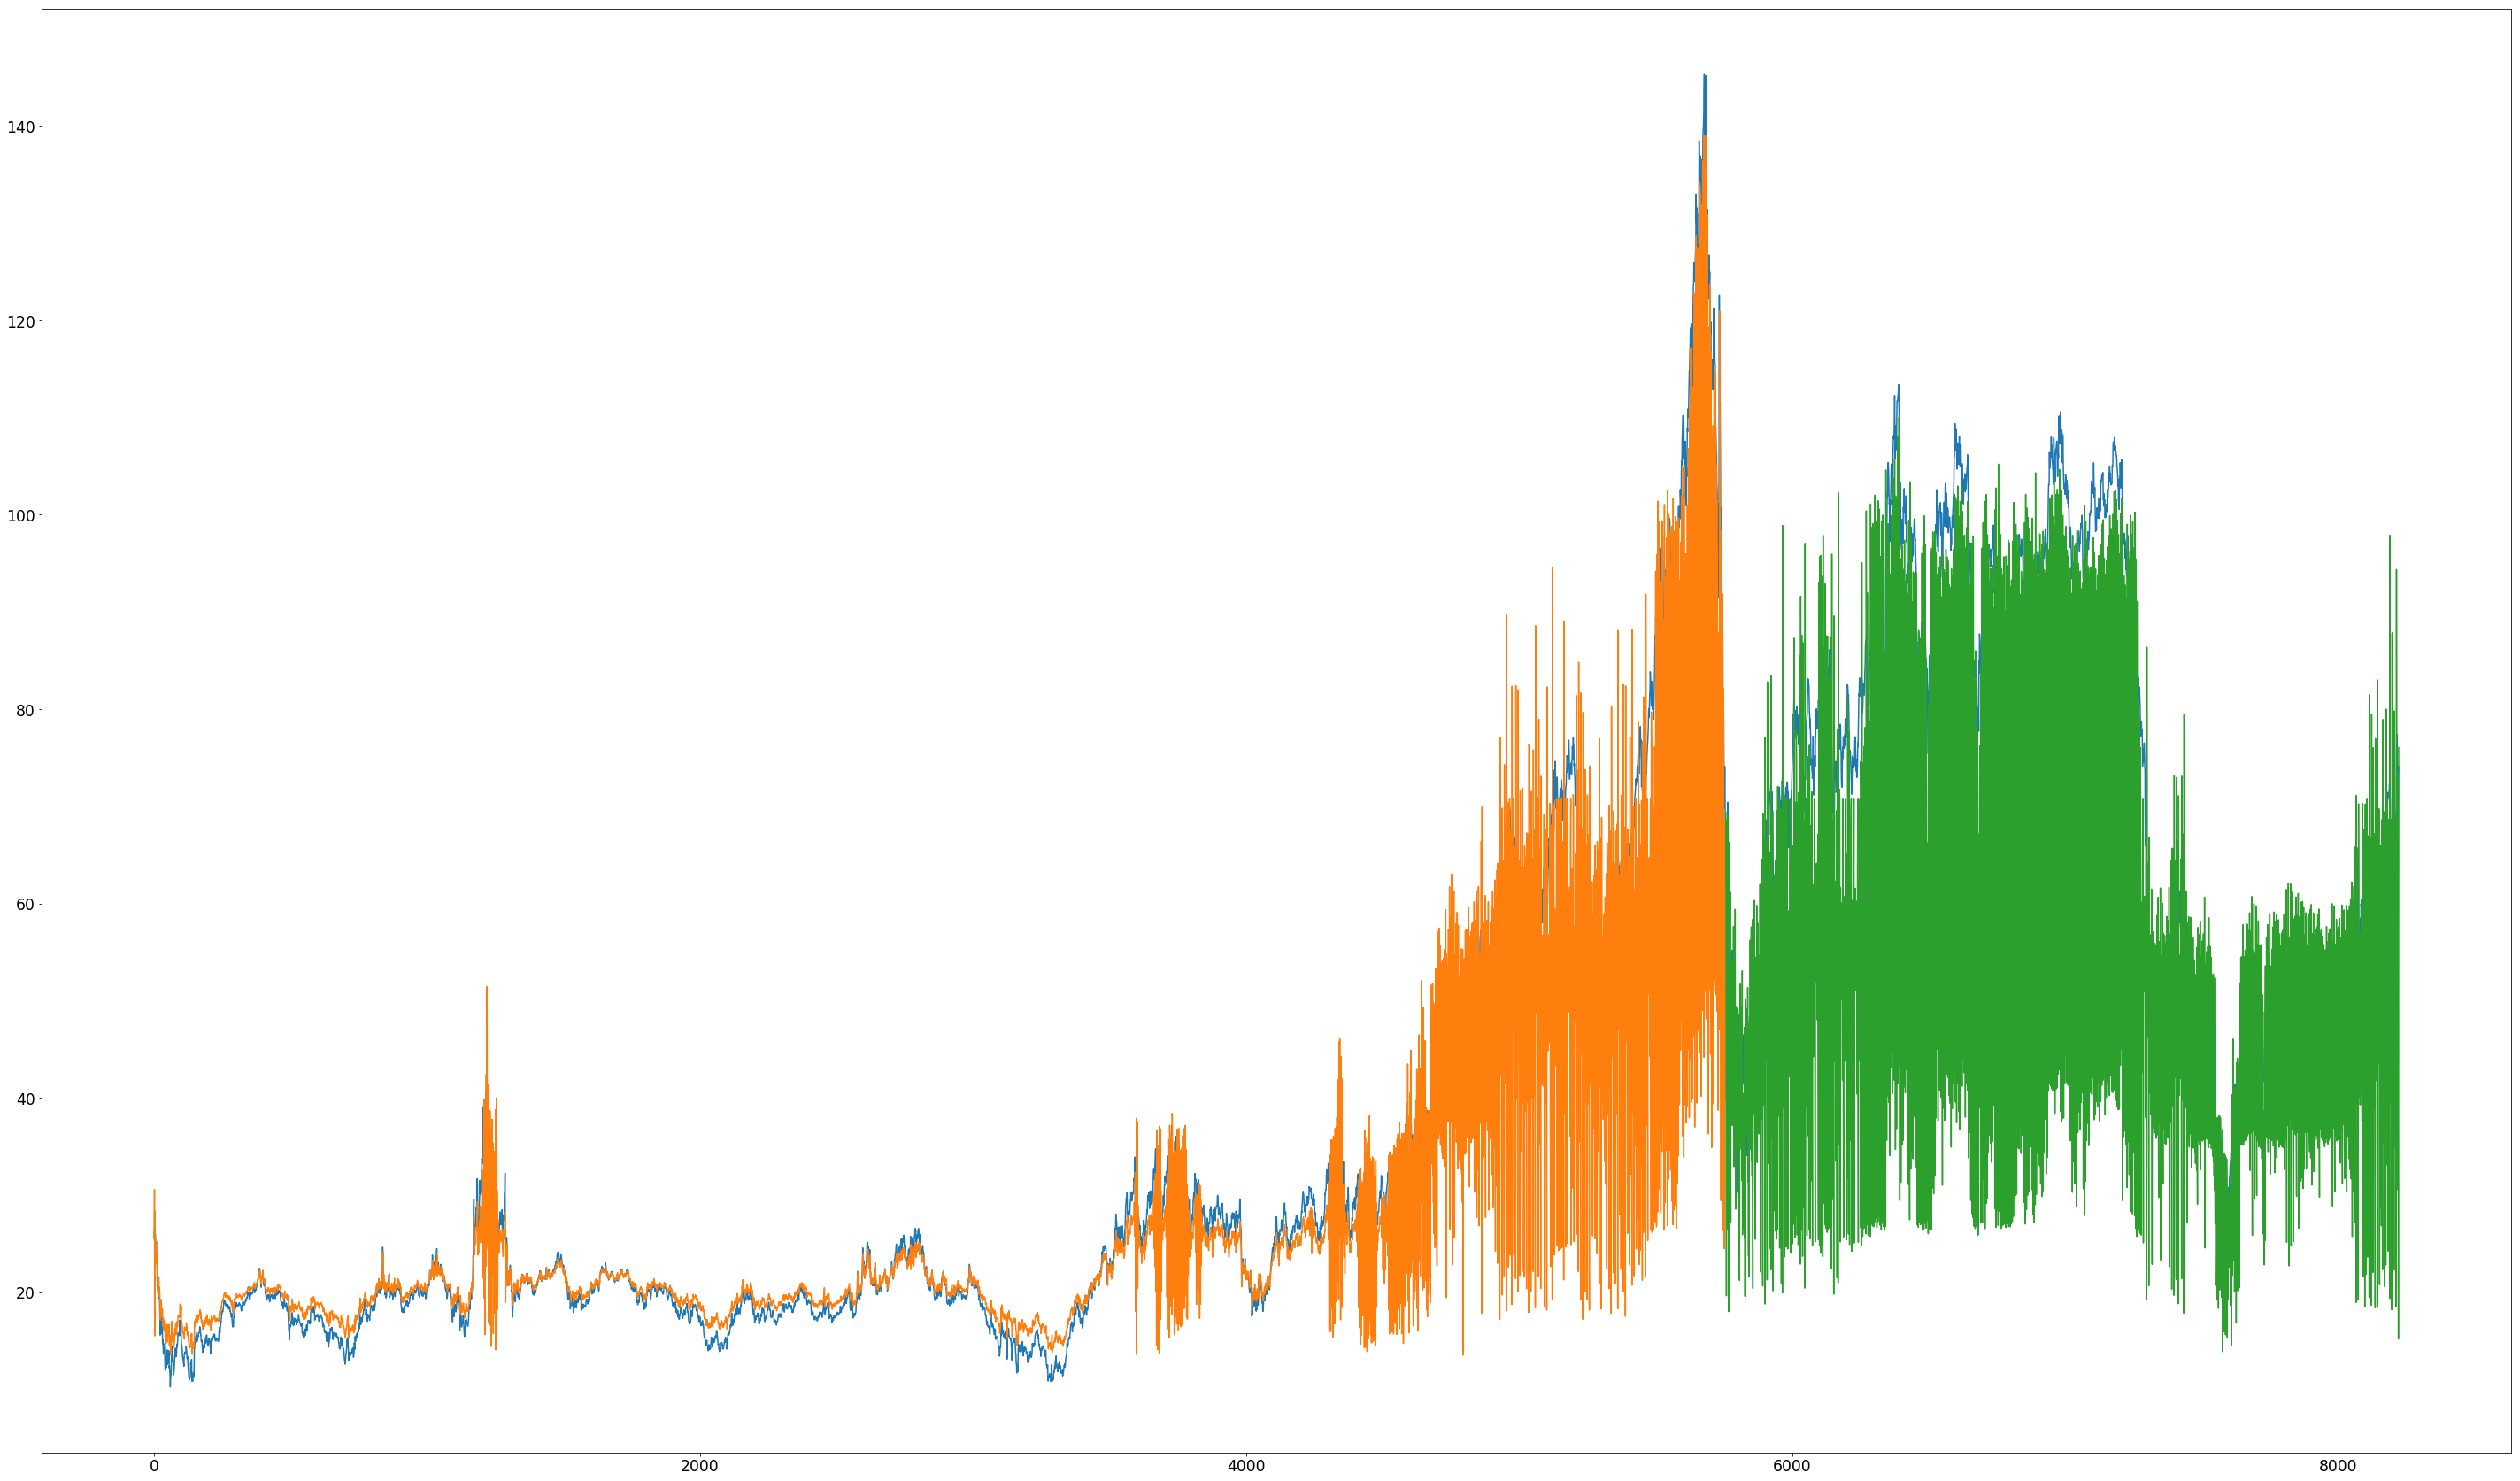

In [23]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()